# Machine Learning Based Heart Disease Prediction

This project uses 4 databases concerning heart disease diagnosis. Title of the database is ***Heart Disease Databases***.

All attributes are numeric-valued.  The data was collected from the four following locations:

     1. Cleveland Clinic Foundation (cleveland.data)
     2. Hungarian Institute of Cardiology, Budapest (hungarian.data)
     3. V.A. Medical Center, Long Beach, CA (long-beach-va.data)
     4. University Hospital, Zurich, Switzerland (switzerland.data)

Each database has the same instance format.  While the databases have 76 raw attributes, only 14 of them are actually used in this project.

The authors of the databases have requested that any publications resulting from the use of the data include the names of the principal investigator responsible for the data collection at each institution.  They would be:

       1. Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
       2. University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
       3. University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
       4. V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.
- Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
- Date: July, 1988

14 attributes (columns) are used :
1. age: age in years     
2. sex: sex (1 = male; 0 = female)  
3.  cp: chest pain type
- Value 1: typical angina
- Value 2: atypical angina
- Value 3: non-anginal pain
- Value 4: asymptomatic
4. trestbps: resting blood pressure (in mm Hg on admission to the hospital)
5. chol: serum cholestoral in mg/dl
6. fbs: (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
7. restecg: resting electrocardiographic results
- Value 0: normal
- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. thalach: maximum heart rate achieved
9. exang: exercise induced angina (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. slope: the slope of the peak exercise ST segment
- Value 1: upsloping
- Value 2: flat
- Value 3: downsloping
12. ca: number of major vessels (0-3) colored by flourosopy
13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. num: diagnosis of heart disease from 0 (no presence) to 4

In [10]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Data Preparation and Cleaning
There are 4 data files from 4 Clinics (Cleveland: 303 rows, Hungarian: 294 rows, Switzerland: 123 rows, and Long Beach VA: 200 rows). Each data file is a text file that contains no column names. Each data is separated by a comma. Each row is ended by a newline. There is a separate description file that describes the name of the 14 columns use in each of this text file and other descriptions about the data.

In this preparation stage we will load all this data from 4 separate files, merge them into one data frame, and clean all the missing values

In [11]:
# Define the paths to the newly uploaded files
file_paths = [
    'data/processed.cleveland.data',
    'data/processed.hungarian.data',
    'data/processed.switzerland.data',
    'data/processed.va.data'
]

# Using the column names given in the description
column_names = [
    'age', 'sex', 'cp', 'trestbps', 'chol', 
    'fbs', 'restecg', 'thalach', 'exang', 
    'oldpeak', 'slope', 'ca', 'thal', 'num'
]

# Initialize an empty list to hold the DataFrames
dfs = []

# Iterate over each file path, load the data into a DataFrame, and append it to the list
for path in file_paths:
    df = pd.read_csv(path, header=None, names=column_names).replace('?', pd.NA)
    dfs.append(df)

# Concatenate all the DataFrames into one
combined_df = pd.concat(dfs, ignore_index=True)

combined_df.head(), combined_df.shape


(    age  sex   cp trestbps   chol  fbs restecg thalach exang oldpeak slope  \
 0  63.0  1.0  1.0    145.0  233.0  1.0     2.0   150.0   0.0     2.3   3.0   
 1  67.0  1.0  4.0    160.0  286.0  0.0     2.0   108.0   1.0     1.5   2.0   
 2  67.0  1.0  4.0    120.0  229.0  0.0     2.0   129.0   1.0     2.6   2.0   
 3  37.0  1.0  3.0    130.0  250.0  0.0     0.0   187.0   0.0     3.5   3.0   
 4  41.0  0.0  2.0    130.0  204.0  0.0     2.0   172.0   0.0     1.4   1.0   
 
     ca thal  num  
 0  0.0  6.0    0  
 1  3.0  3.0    2  
 2  2.0  7.0    1  
 3  0.0  3.0    0  
 4  0.0  3.0    0  ,
 (920, 14))

### Cleaning the dataframe by treating the missing values

There are 3 steps involved :
1. Check which columns have missing values.

2. Determine the strategy for each column based on its type and significance.
- For categorical columns, replacing missing values with the mode or a special category like '-1' (represents unknown) might be suitable.
- For numerical columns, imputing missing values with the median instead of mean could be appropriate given the clinical significance to minimise the impact of outliers.

3. Apply the chosen strategies to handle missing values.

In [12]:
# Check which columns have missing values in the uncleaned DataFrame
columns_with_missing_values = combined_df.isna().sum()
print("Column with missing values and their respective amount of missing values : ")
columns_with_missing_values[columns_with_missing_values > 0]

Column with missing values and their respective amount of missing values : 


trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
dtype: int64

***Identifying the columns with missing value***

- Categorical columns with missing values are :
1. fbs
2. restecg
3. exang
4. slope
5. thal
6. ca

- Numerical columns with missing values are :
1. trestbps
2. chol
3. thalach
4. oldpeak

***Treatment for missing values***

- Numerical columns missing values were imputed with the median.
- Categorical columns missing values were replaced with the mode of their respective columns.
- For the columns ca and thal, missing values were replaced with '-1' (which is its own separate category and represent unknown) to indicate the absence of data without assuming any clinical value because we have deduced that these 2 columns are very important in the diagnosis and imputing a value may contribute to inaaccurate diagnosis

Note : 
Since ca and thal are essential for diagnoses and can be considered categorical with clinical data , we will treat them carefully, categorizing missing values as '-1' as the value of '-1' does not hold any numeric significance (represent unknown).

- ca: number of major vessels (0-3) colored by flourosopy
- thal: 3 = normal; 6 = fixed defect; 7 = reversable defect

In [13]:
from sklearn.impute import SimpleImputer
# Define the list of categorical columns intended for mode imputation
categorical_columns_with_mode = ['fbs', 'restecg', 'exang', 'slope']

# Define list of numerical columns intended to be imputed with the median
numerical_columns = ['trestbps', 'chol', 'thalach', 'oldpeak']
numerical_imputer = SimpleImputer(strategy='median')

# Convert pd.NA to np.nan for numerical columns again to ensure no issues
combined_df[numerical_columns] = combined_df[numerical_columns].apply(lambda col: col.replace(pd.NA, np.nan))

# Apply median imputation for numerical columns again to be safe
combined_df[numerical_columns] = numerical_imputer.fit_transform(combined_df[numerical_columns])

# Replace missing values with 'unknown' for 'ca' and 'thal' columns
combined_df['ca'].replace(pd.NA, -1, inplace=True)
combined_df['thal'].replace(pd.NA, -1, inplace=True)

# For the categorical columns, replace missing values with the mode (now ensuring the variable is defined)
for column in categorical_columns_with_mode:
    combined_df[column] = combined_df[column].replace(pd.NA, combined_df[column].mode().iloc[0])

# Final check for missing values
final_missing_values_check_again = combined_df.isnull().sum()
final_missing_values_check_again, combined_df.head()

(age         0
 sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 num         0
 dtype: int64,
     age  sex   cp  trestbps   chol  fbs restecg  thalach exang  oldpeak slope  \
 0  63.0  1.0  1.0     145.0  233.0  1.0     2.0    150.0   0.0      2.3   3.0   
 1  67.0  1.0  4.0     160.0  286.0  0.0     2.0    108.0   1.0      1.5   2.0   
 2  67.0  1.0  4.0     120.0  229.0  0.0     2.0    129.0   1.0      2.6   2.0   
 3  37.0  1.0  3.0     130.0  250.0  0.0     0.0    187.0   0.0      3.5   3.0   
 4  41.0  0.0  2.0     130.0  204.0  0.0     2.0    172.0   0.0      1.4   1.0   
 
     ca thal  num  
 0  0.0  6.0    0  
 1  3.0  3.0    2  
 2  2.0  7.0    1  
 3  0.0  3.0    0  
 4  0.0  3.0    0  )

### Exploratory Data Analysis

The name of the clean dataframe with no missing values we are working with is called 'combined.df'. In Exploratory Data Analysis, we want to analyse each variable in detail and better understand its relationship with the target variable 'num'.

There are steps involved:
1. Classification of Variables – Classify each variable into either of 2 categories: Numerical Data or Categorical Data
2. For Numeric Data, we want to: 
- (a) Visualise with boxplots to identify outliers and remove them from combined_df to produce a cleaner dataset
- (b) Compute and display the basic statistics of each numeric data (mean, median, standard deviation, range)
3. For Categorical Data, we want to:
- (a) Find the frequency distribution of each categorical variable and visualise it with bar graphs
- (b) Conduct cross-tabulation and stacked bar plots to see the distribution of target variable 'num' across each categorical variable

In [14]:
display(combined_df)
combined_df.shape
combined_df.info()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,54.0,0.0,4.0,127.0,333.0,1,1,154.0,0,0.0,2,-1,-1,1
916,62.0,1.0,1.0,130.0,139.0,0,1,140.0,0,0.5,2,-1,-1,0
917,55.0,1.0,4.0,122.0,223.0,1,1,100.0,0,0.0,2,-1,6,2
918,58.0,1.0,4.0,130.0,385.0,1,2,140.0,0,0.5,2,-1,-1,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       920 non-null    float64
 1   sex       920 non-null    float64
 2   cp        920 non-null    float64
 3   trestbps  920 non-null    float64
 4   chol      920 non-null    float64
 5   fbs       920 non-null    object 
 6   restecg   920 non-null    object 
 7   thalach   920 non-null    float64
 8   exang     920 non-null    object 
 9   oldpeak   920 non-null    float64
 10  slope     920 non-null    object 
 11  ca        920 non-null    object 
 12  thal      920 non-null    object 
 13  num       920 non-null    int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 100.8+ KB


From the information above and description of variables, we can now classify each variable into 2 groups: Categorical or Numerical Data

- Numerical Data:
1. age
2. trestbps
3. chol
4. thalach
5. oldpeak


- Categorical Data:
6. sex
7. cp
8. fbs
9. restecg
10. exang
11. slope
12. ca
13. thal
14. num

#### **EDA of Numerical Data**

For Numerical Data, we will first visualise each data using boxplots to identify if there are outliers. Outliers can significantly affect the results of data analysis and statistical modeling. 

After removing the outliers (if any), we can then compute the basic statistics (mean, median, standard deviation and range) 

##### *Visualising Current Numerical Data using Boxplots*

<Axes: >

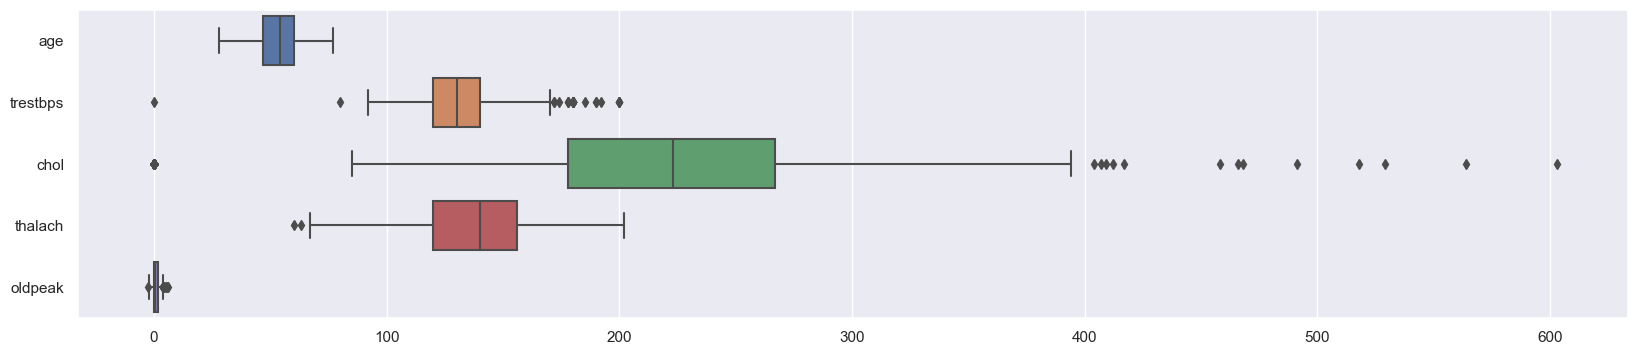

In [15]:
numeric_columns = ['age','trestbps', 'chol', 'thalach', 'oldpeak'] 

#Create a dataframe consisting of numerical data from clean dataframe
numeric_df = combined_df[numeric_columns]


#Comprehensive view of boxplots
f = plt.figure(figsize=(20, 4))     
sb.boxplot(data = numeric_df, orient = "h")


A more detailed and bigger diagram of boxplot for each variable can be seen here:

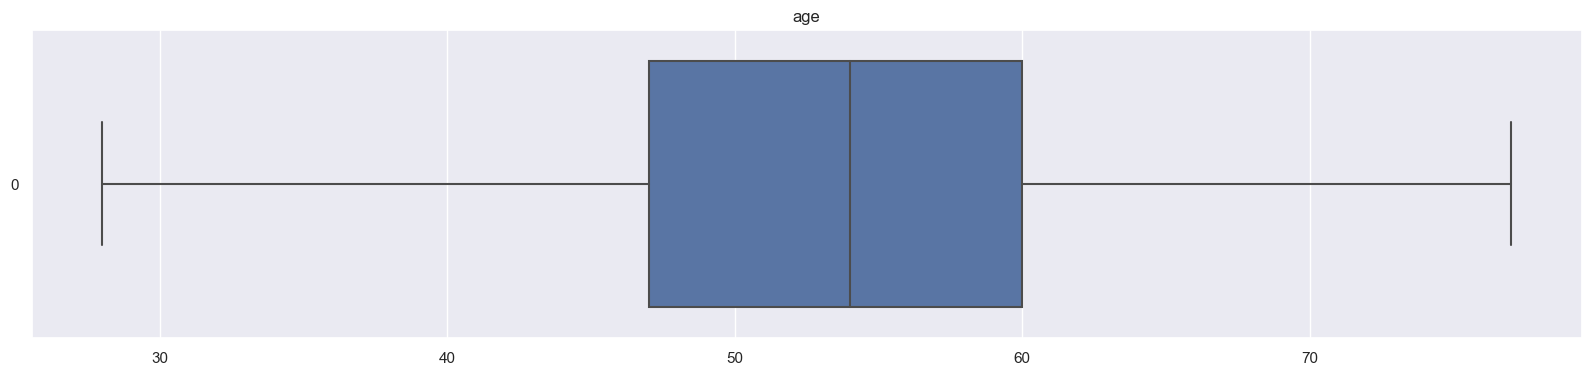

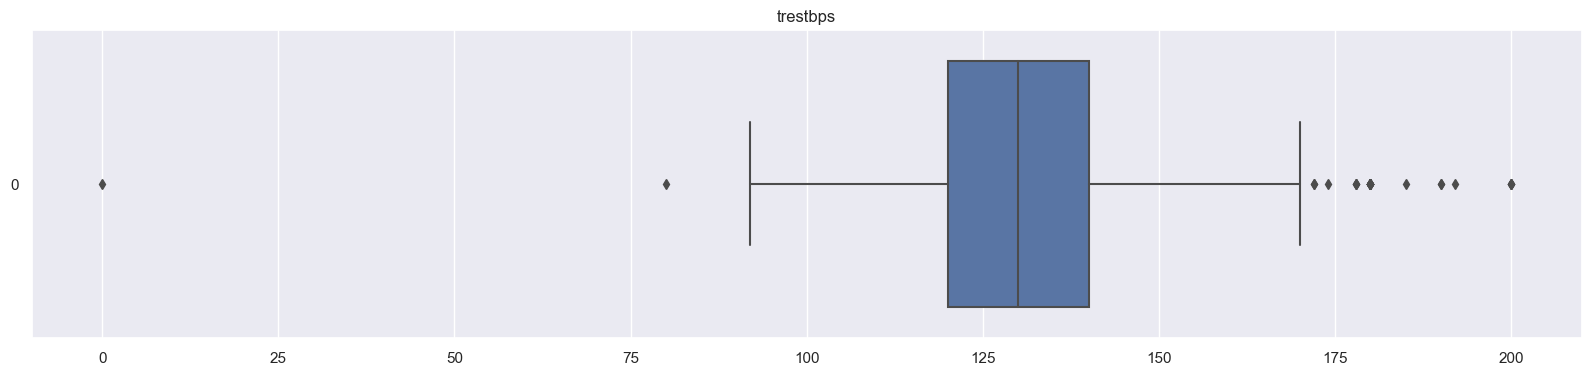

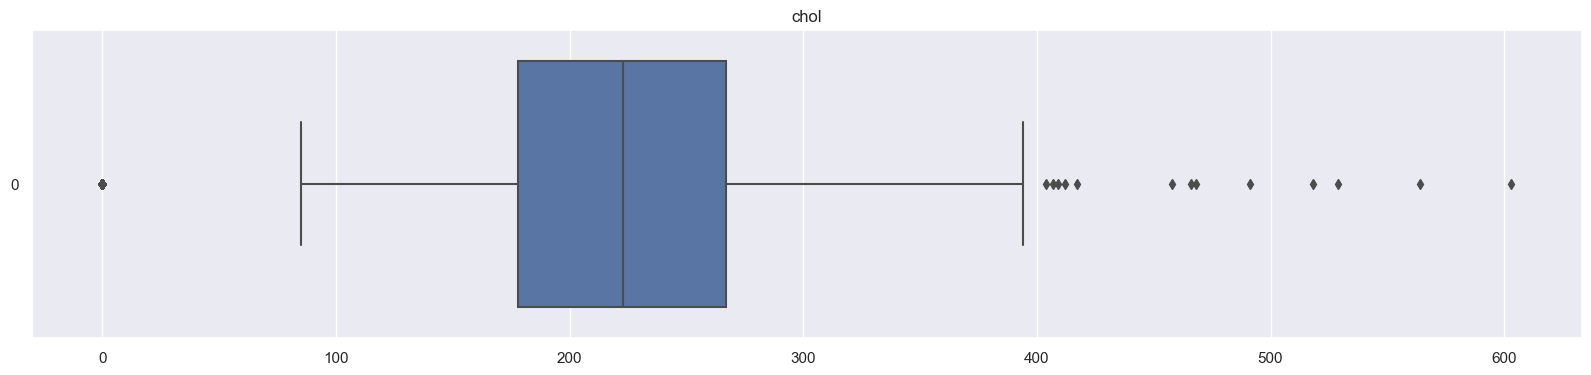

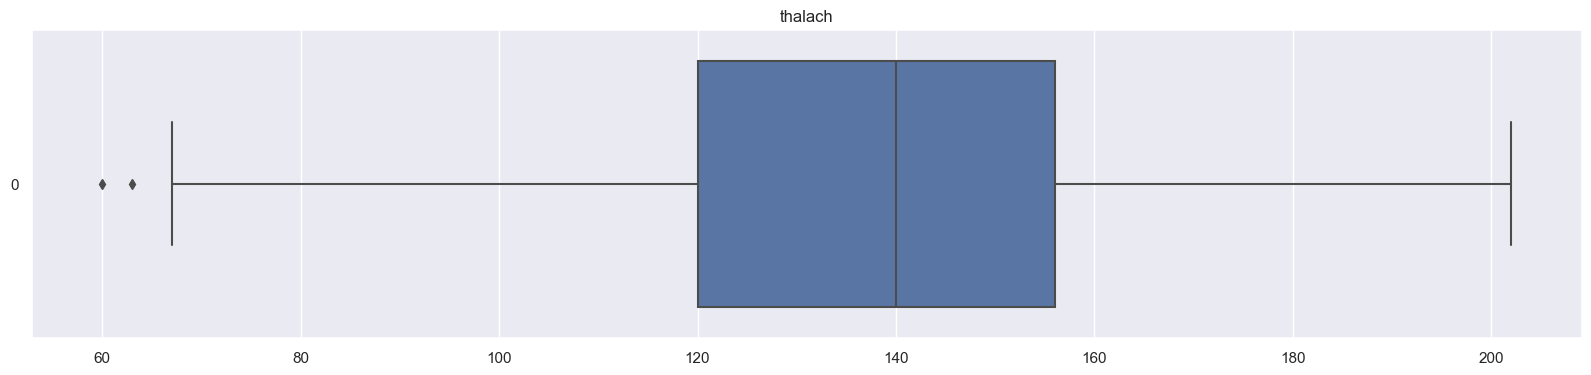

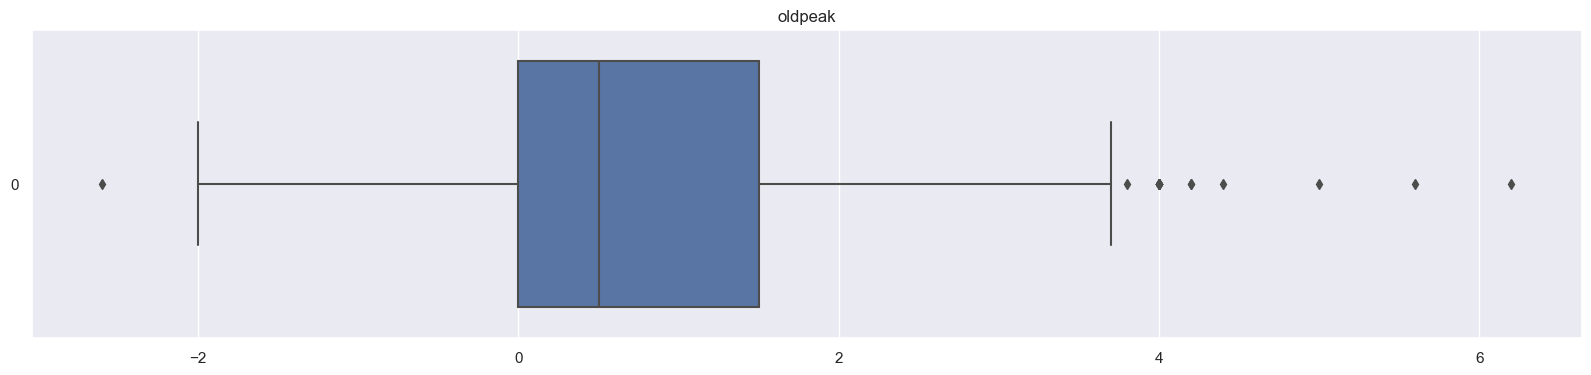

In [16]:
for column in numeric_df:
    f = plt.figure(figsize=(20, 4))     
    sb.boxplot(data = numeric_df[column], orient = "h")
    plt.title(column)

There are outliers present in every numerical variable except "age". 

##### *Identifying and Treating Outliers*
As seen from above, there are outliers present in every numerical variable except "age". We will extract these data points out of the dataframe to produce a clean dataset without outlier data to enhance the accuracy of our analysis.


[(26.5, 78.5), (90.0, 170.0), (118.5, 362.5), (72.5, 212.5), (-2.175, 3.625)]
[(26.5, 78.5), (90.0, 170.0), (118.5, 362.5), (72.5, 212.5), (-2.175, 3.625)]
Clean DataFrame:


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       679 non-null    float64
 1   sex       679 non-null    float64
 2   cp        679 non-null    float64
 3   trestbps  679 non-null    float64
 4   chol      679 non-null    float64
 5   fbs       679 non-null    object 
 6   restecg   679 non-null    object 
 7   thalach   679 non-null    float64
 8   exang     679 non-null    object 
 9   oldpeak   679 non-null    float64
 10  slope     679 non-null    object 
 11  ca        679 non-null    object 
 12  thal      679 non-null    object 
 13  num       679 non-null    int64  
dtypes: float64(7), int64(1), object(6)
memory usage: 74.4+ KB
None


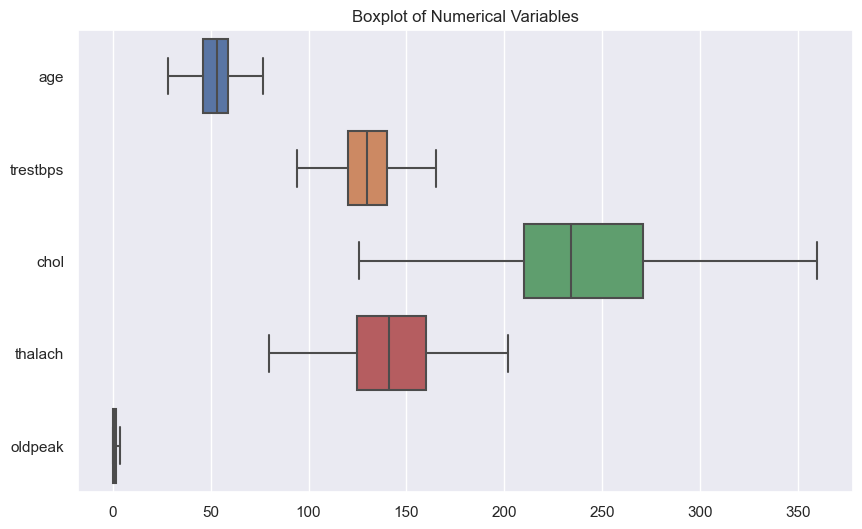

In [20]:
# Detecting and Handling Outliers in Numerical Data
for i in range(2):
    bounds = []
    for column in numeric_columns:
        Q1 = combined_df[column].quantile(0.25)
        Q3 = combined_df[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        bounds.append((lower_bound,upper_bound))
        
    print(bounds)
        

    for i in range(len(numeric_columns)):
        # Remove outliers
        combined_df = combined_df[(combined_df[numeric_columns[i]] > bounds[i][0]) & (combined_df[numeric_columns[i]] < bounds[i][1])]


# Resetting index after removing outliers
combined_df.reset_index(drop=True, inplace=True)

# Display the clean DataFrame
print("Clean DataFrame:")
display(combined_df.head())
print(combined_df.info())

# Boxplot for numerical data to verify outlier treatment
plt.figure(figsize=(10, 6))
sb.boxplot(data=combined_df[numeric_columns], orient="h")
plt.title("Boxplot of Numerical Variables")
plt.show()

##### *Summary Statistics of Numeric Variables*
Using now clean dataframe free of outlier data, we can compute and display the summary statistics of each numeric data.

In [18]:
# Summary statistics for numerical data
numeric_df = combined_df[numeric_columns]
print("Summary Statistics for Numerical Data:")
print(numeric_df.describe())

Summary Statistics for Numerical Data:
              age    trestbps        chol     thalach     oldpeak
count  679.000000  679.000000  679.000000  679.000000  679.000000
mean    52.567010  130.350515  240.179676  141.784978    0.779823
std      9.470393   14.501479   45.240036   23.899637    0.937355
min     28.000000   94.000000  126.000000   80.000000    0.000000
25%     46.000000  120.000000  210.000000  125.000000    0.000000
50%     53.000000  130.000000  234.000000  141.000000    0.500000
75%     59.000000  140.000000  271.000000  160.000000    1.450000
max     77.000000  165.000000  360.000000  202.000000    3.600000


In [19]:
numeric_df.max()-numeric_df.min()

age          49.0
trestbps     71.0
chol        234.0
thalach     122.0
oldpeak       3.6
dtype: float64

From the information above, we can summarise the basic statistics for each variable as such:

1. age
- mean: 52.567010
- median: 53
- standard deviation: 9.470393
- range: 77 - 28 = 49 

2. trestbps
- mean: 130.350515
- median: 130
- standard deviation: 14.501479
- range: 165 - 94 = 71

3. chol        
- mean: 240.179676
- median: 234
- standard deviation: 45.240036
- range: 360 - 126 = 234

4. thalach 
- mean: 141.784878
- median: 141
- standard deviation: 23.899637
- range: 202 - 80 = 122

5. oldpeak       
- mean: 0.779823
- median: 0.5
- standard deviation: 0.937355
- range: 3.6 - 0 = 3.6

#### **EDA of Categorical Data**

For Categorical Data, our purpose is to understand the distribution of each category and its relationship with the target variable (in this case, 'num', representing the diagnosis of heart disease). 

1. For the distribution of each variable, we can visualise the frequency distribution of each categorical data via Bar Graphs (since categorical data is discrete). 

2. For understanding the relationship between categorical variables and target variable ('num'), we can conduct 
- a. Cross-tabulation to examine the relationship between two categorical variables and
- b. Stacked Bar Plots to compare the distribution of a categorical variable ('num') across different categories of another variable. 


##### *Frequency Counts and Bar Plots*
Firstly, we will display the Frequency Counts and Bar Plots to reveal the distribution and prevalence of each cate

Frequency Counts for Each Categorical Variable:

SEX Distribution:
sex
1.0    524
0.0    167
Name: count, dtype: int64


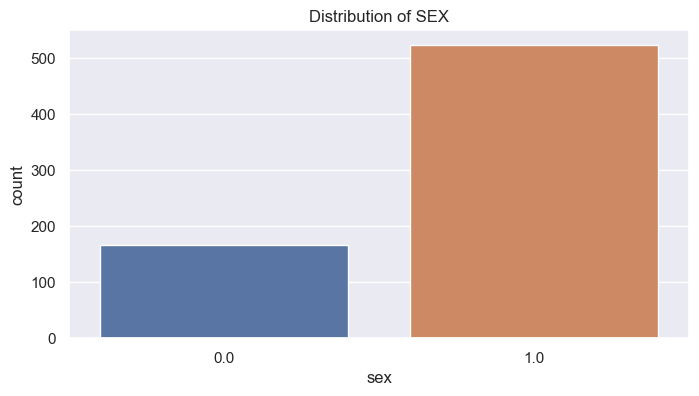


CP Distribution:
cp
4.0    331
3.0    164
2.0    160
1.0     36
Name: count, dtype: int64


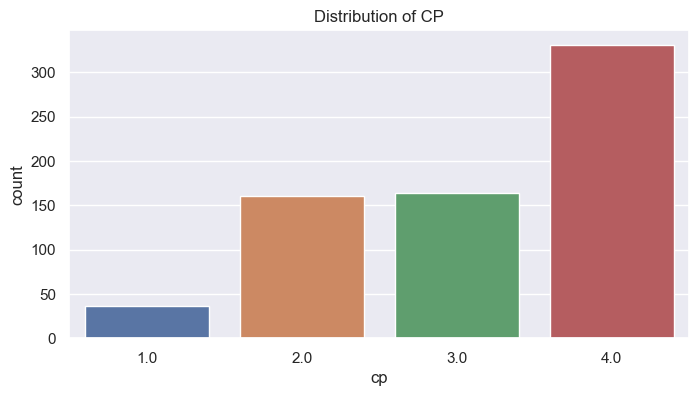


FBS Distribution:
fbs
0.0    582
1.0    109
Name: count, dtype: int64


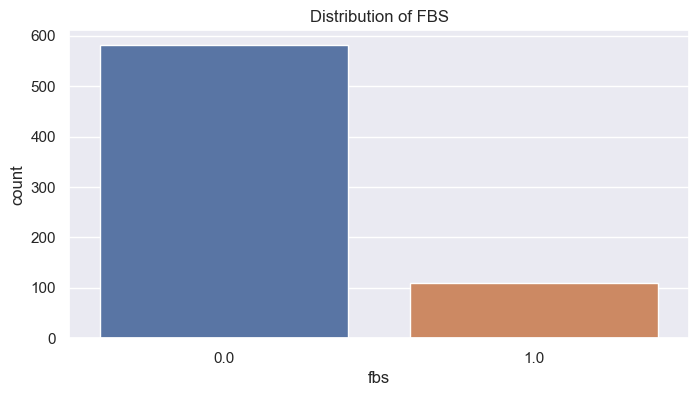


RESTECG Distribution:
restecg
0.0    419
2.0    161
1.0    111
Name: count, dtype: int64


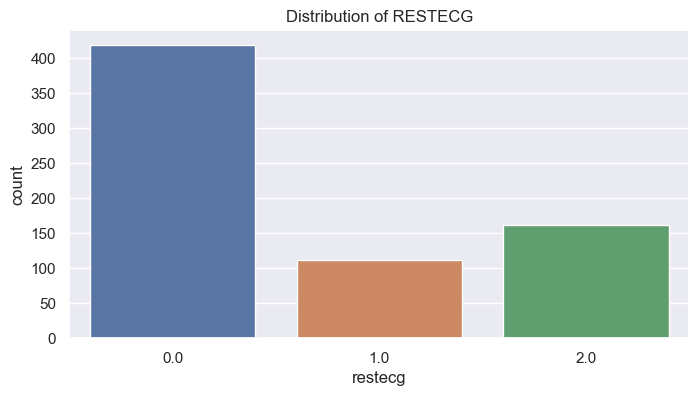


EXANG Distribution:
exang
0.0    463
1.0    228
Name: count, dtype: int64


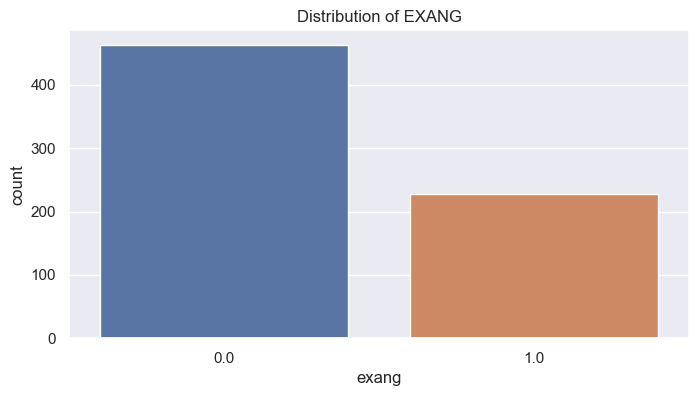


SLOPE Distribution:
slope
2.0    503
1.0    159
3.0     29
Name: count, dtype: int64


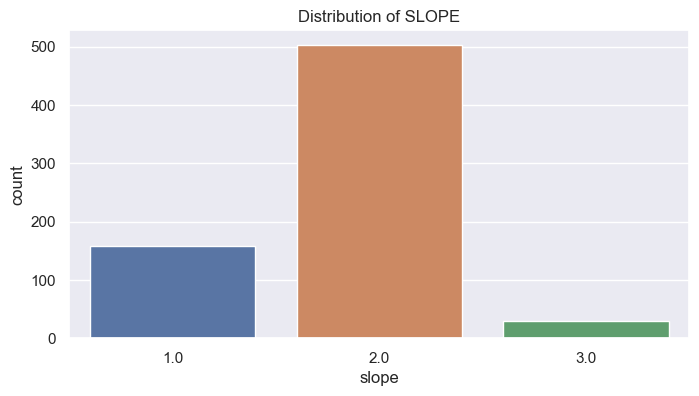


CA Distribution:
ca
-1.0    411
 0.0    168
 1.0     63
 2.0     33
 3.0     16
Name: count, dtype: int64


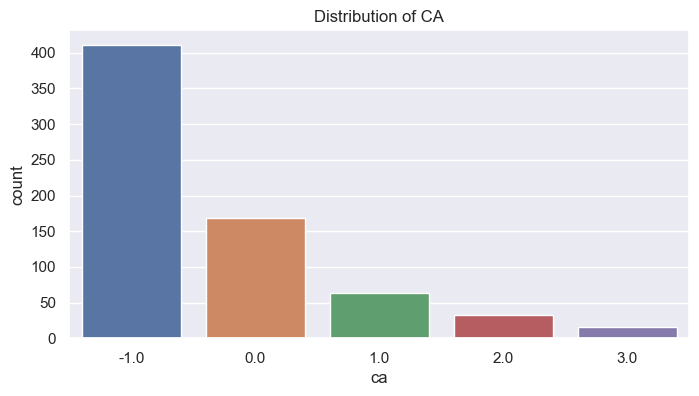


THAL Distribution:
thal
-1.0    366
 3.0    172
 7.0    123
 6.0     30
Name: count, dtype: int64


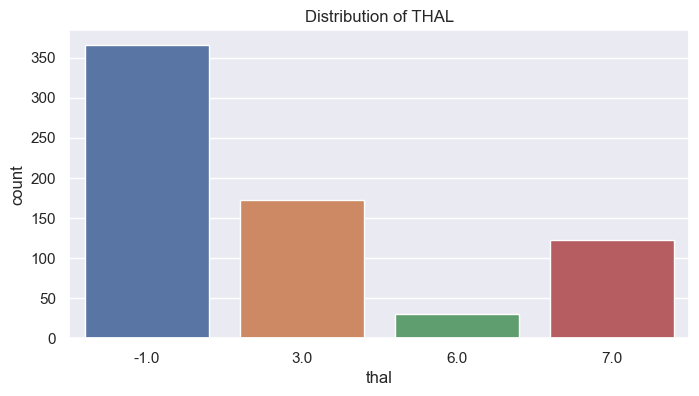


NUM Distribution:
num
0.0    375
1.0    184
3.0     60
2.0     57
4.0     15
Name: count, dtype: int64


In [11]:
# Define Categorical columns 
categorical_columns = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'num']

#Convert values to float datatype
combined_df = combined_df.astype(float)

# Frequency counts for each categorical variable
print("Frequency Counts for Each Categorical Variable:")
for column in categorical_columns:
    print(f"\n{column.upper()} Distribution:")
    print(combined_df[column].value_counts())
    
    # Bar plots for each categorical variable
    
    if column != 'num':   # Exclude the target variable 'num' for now
        plt.figure(figsize=(8, 4))
        sb.countplot(x=column, data=combined_df)
        plt.title(f"Distribution of {column.upper()}")
        plt.show()

##### *Cross-tabulation and Stacked Bar Plots*

Next, we can implement Cross-tabulation and Stacked Bar Plot, which help visualize how the categories of each variable relate to the presence of heart disease, which is crucial for understanding potential risk factors.



Cross-tabulation between SEX and NUM:
num    0.0  1.0  2.0  3.0  4.0  Total
sex                                  
0.0    136   22    4    4    1    167
1.0    239  162   52   56   14    523
Total  375  184   56   60   15    690


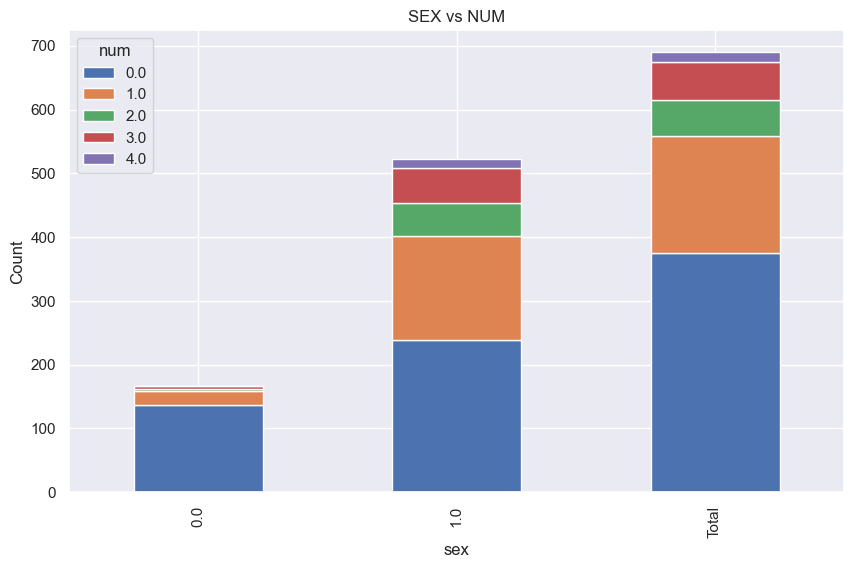


Cross-tabulation between CP and NUM:
num    0.0  1.0  2.0  3.0  4.0  Total
cp                                   
1.0     23    9    1    3    0     36
2.0    142   15    1    2    0    160
3.0    119   25    7   10    3    164
4.0     91  135   47   45   12    330
Total  375  184   56   60   15    690


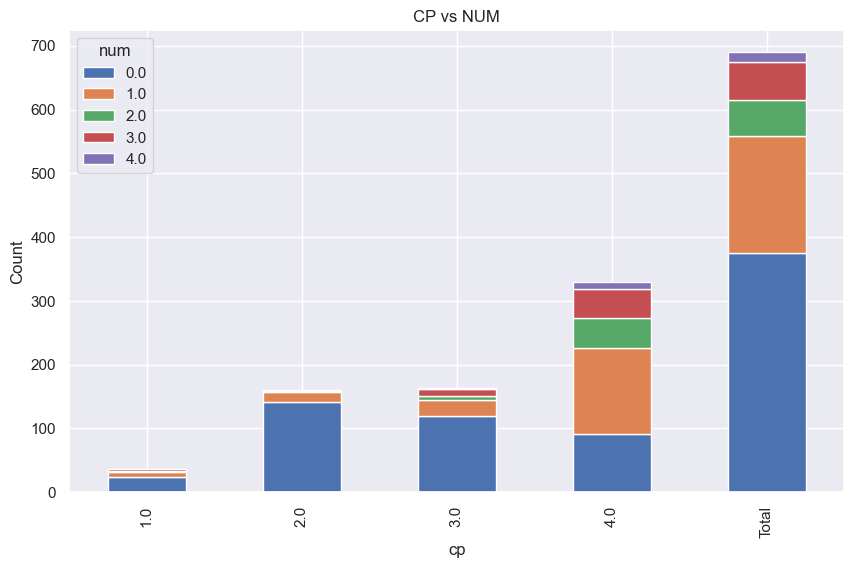


Cross-tabulation between FBS and NUM:
num    0.0  1.0  2.0  3.0  4.0  Total
fbs                                  
0.0    335  153   39   43   11    581
1.0     40   31   17   17    4    109
Total  375  184   56   60   15    690


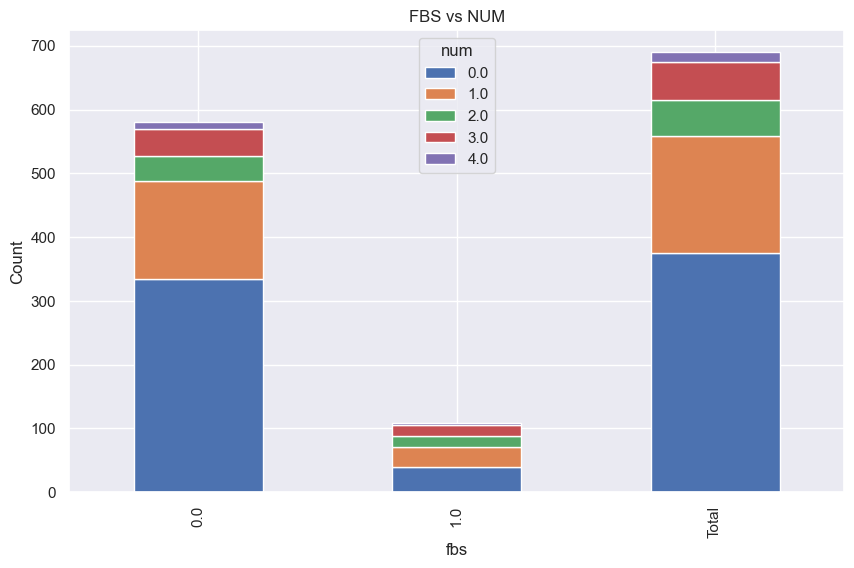


Cross-tabulation between RESTECG and NUM:
num      0.0  1.0  2.0  3.0  4.0  Total
restecg                                
0.0      250  119   25   23    1    418
1.0       48   28   16   15    4    111
2.0       77   37   15   22   10    161
Total    375  184   56   60   15    690


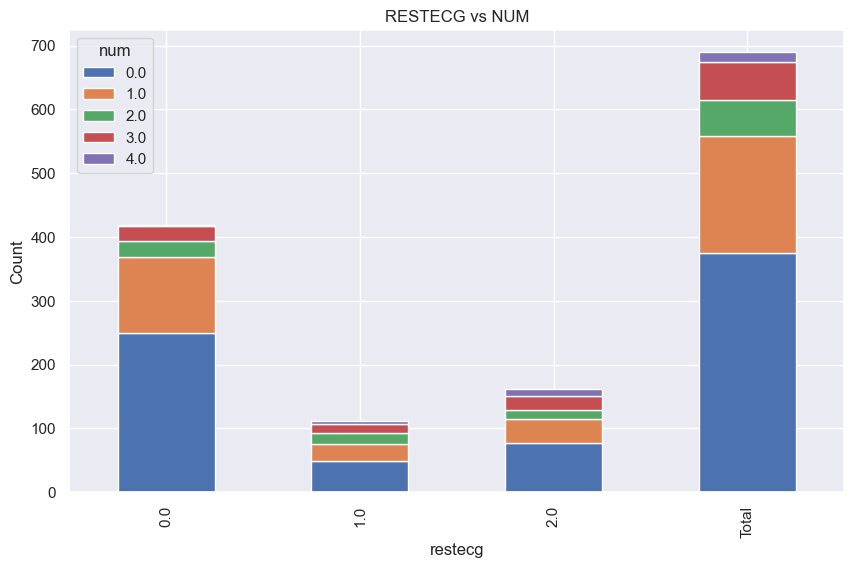


Cross-tabulation between EXANG and NUM:
num    0.0  1.0  2.0  3.0  4.0  Total
exang                                
0.0    327   80   23   24    8    462
1.0     48  104   33   36    7    228
Total  375  184   56   60   15    690


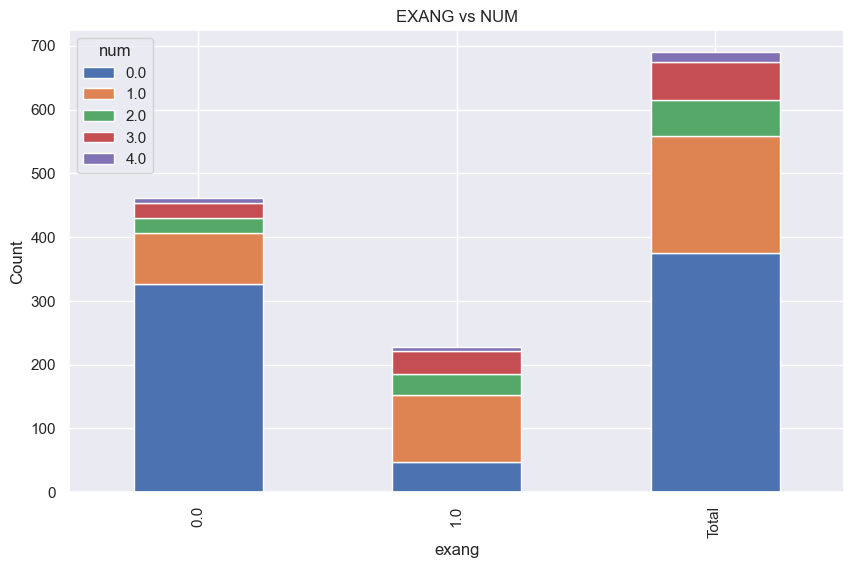


Cross-tabulation between SLOPE and NUM:
num    0.0  1.0  2.0  3.0  4.0  Total
slope                                
1.0    116   25    7   10    1    159
2.0    250  152   43   45   12    502
3.0      9    7    6    5    2     29
Total  375  184   56   60   15    690


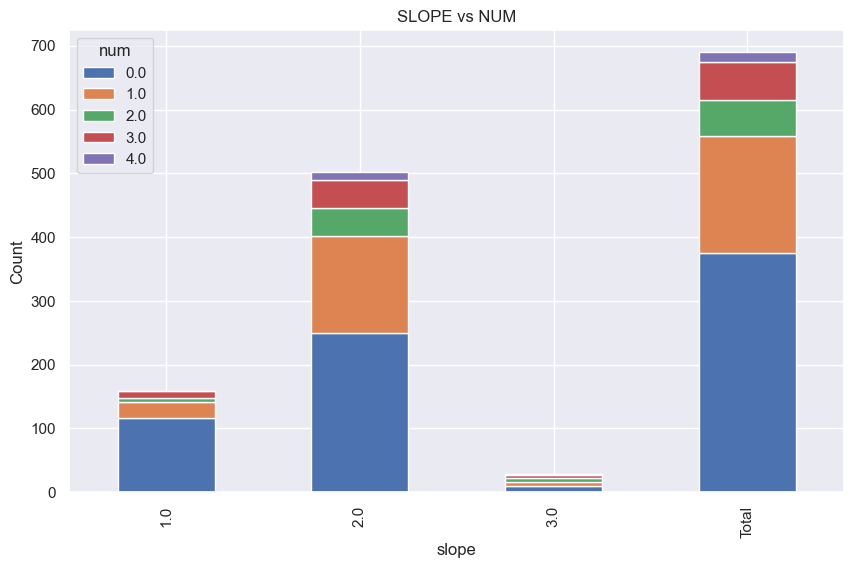


Cross-tabulation between CA and NUM:
num    0.0  1.0  2.0  3.0  4.0  Total
ca                                   
-1.0   218  131   26   31    5    411
0.0    127   26    6    6    2    167
1.0     20   18   14    8    3     63
2.0      7    6    6   12    2     33
3.0      3    3    4    3    3     16
Total  375  184   56   60   15    690


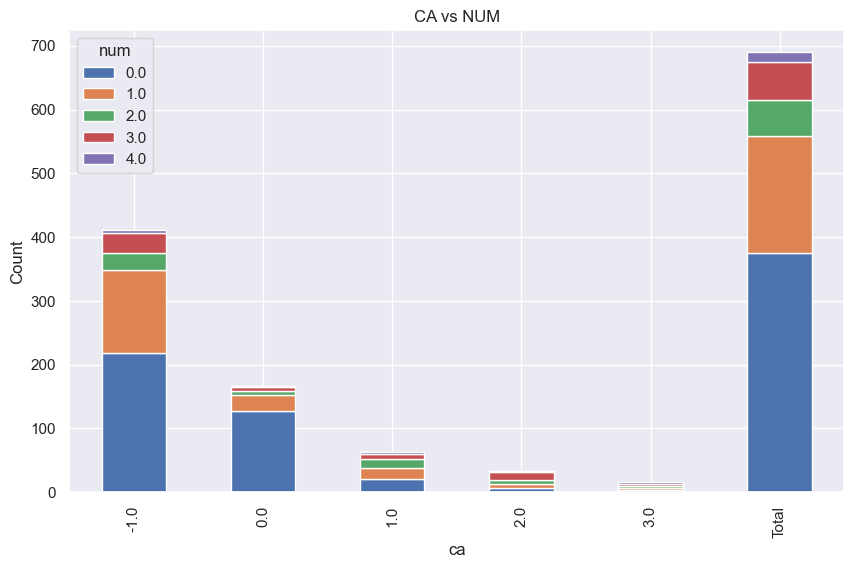


Cross-tabulation between THAL and NUM:
num    0.0  1.0  2.0  3.0  4.0  Total
thal                                 
-1.0   198  112   21   30    5    366
3.0    136   21    6    6    2    171
6.0     10   10    8    1    1     30
7.0     31   41   21   23    7    123
Total  375  184   56   60   15    690


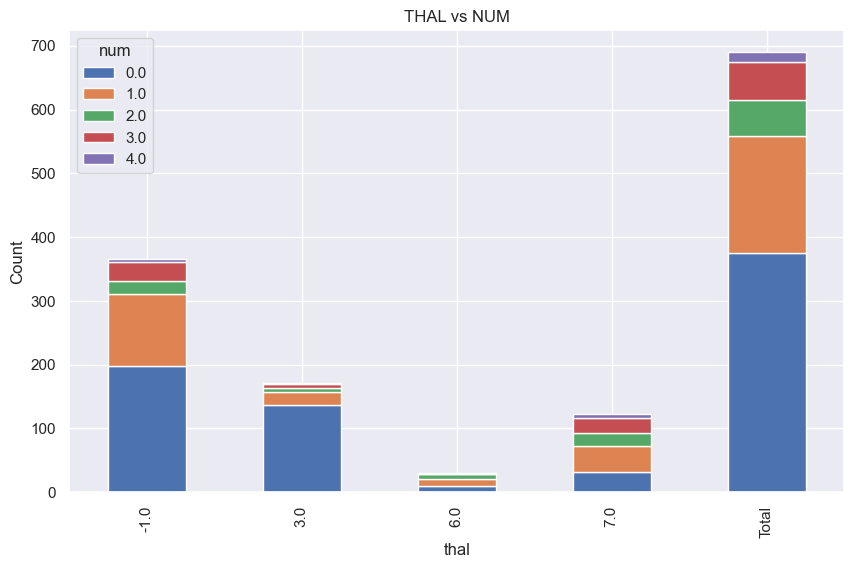

In [12]:
# Cross-tabulation between categorical variables and the target variable 'num'
for column in categorical_columns[:-1]:  # Exclude 'num' itself
    ct = pd.crosstab(index=combined_df[column], columns=combined_df['num'], margins=True, margins_name="Total")
    print(f"\nCross-tabulation between {column.upper()} and NUM:")
    print(ct)

    # Stacked bar plot to show the relationship between the categorical variable and the target
    ct.drop('Total', axis=1, inplace=True)  # Drop the 'Total' row for visualization
    ct.plot(kind='bar', stacked=True, figsize=(10, 6))
    plt.title(f"{column.upper()} vs NUM")
    plt.ylabel('Count')
    plt.show()

### BINARY CLASSIFICATION TREE

In [13]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]

y = pd.DataFrame(combined_df['num'].astype('category'))
X = pd.DataFrame(combined_df[predictors]) 

In [14]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [15]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 7)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Ensure figures are displayed inline in Jupyter Notebook
%matplotlib inline

In [16]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.839458413926499

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5838150289017341



<Axes: >

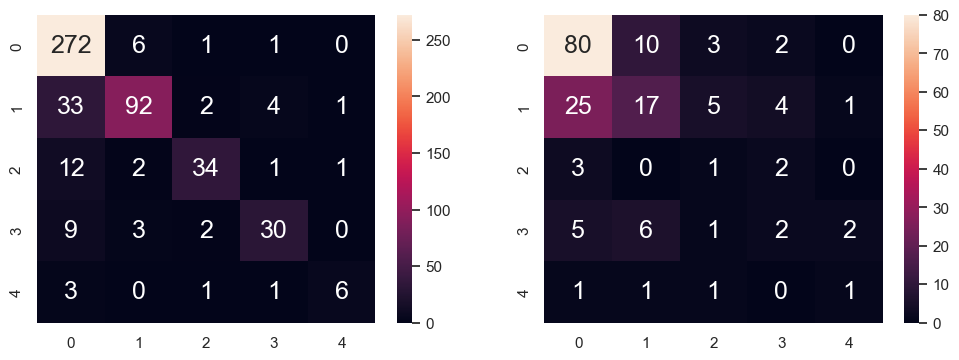

In [17]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

[Text(0.45577830188679247, 0.9375, 'cp <= 3.5\ngini = 0.624\nsamples = 517\nvalue = [280, 132, 50, 44, 11]\nclass = 0'),
 Text(0.2270047169811321, 0.8125, 'age <= 57.5\ngini = 0.355\nsamples = 273\nvalue = [216, 34, 7, 13, 3]\nclass = 0'),
 Text(0.12264150943396226, 0.6875, 'oldpeak <= 0.25\ngini = 0.222\nsamples = 202\nvalue = [177, 20, 0, 4, 1]\nclass = 0'),
 Text(0.06839622641509434, 0.5625, 'exang <= 0.5\ngini = 0.12\nsamples = 141\nvalue = [132, 9, 0, 0, 0]\nclass = 0'),
 Text(0.04245283018867924, 0.4375, 'cp <= 1.5\ngini = 0.098\nsamples = 136\nvalue = [129, 7, 0, 0, 0]\nclass = 0'),
 Text(0.018867924528301886, 0.3125, 'trestbps <= 130.0\ngini = 0.48\nsamples = 5\nvalue = [3, 2, 0, 0, 0]\nclass = 0'),
 Text(0.009433962264150943, 0.1875, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0, 0, 0]\nclass = 0'),
 Text(0.02830188679245283, 0.1875, 'gini = 0.0\nsamples = 2\nvalue = [0, 2, 0, 0, 0]\nclass = 1'),
 Text(0.0660377358490566, 0.3125, 'trestbps <= 117.5\ngini = 0.073\nsamples = 131\nv

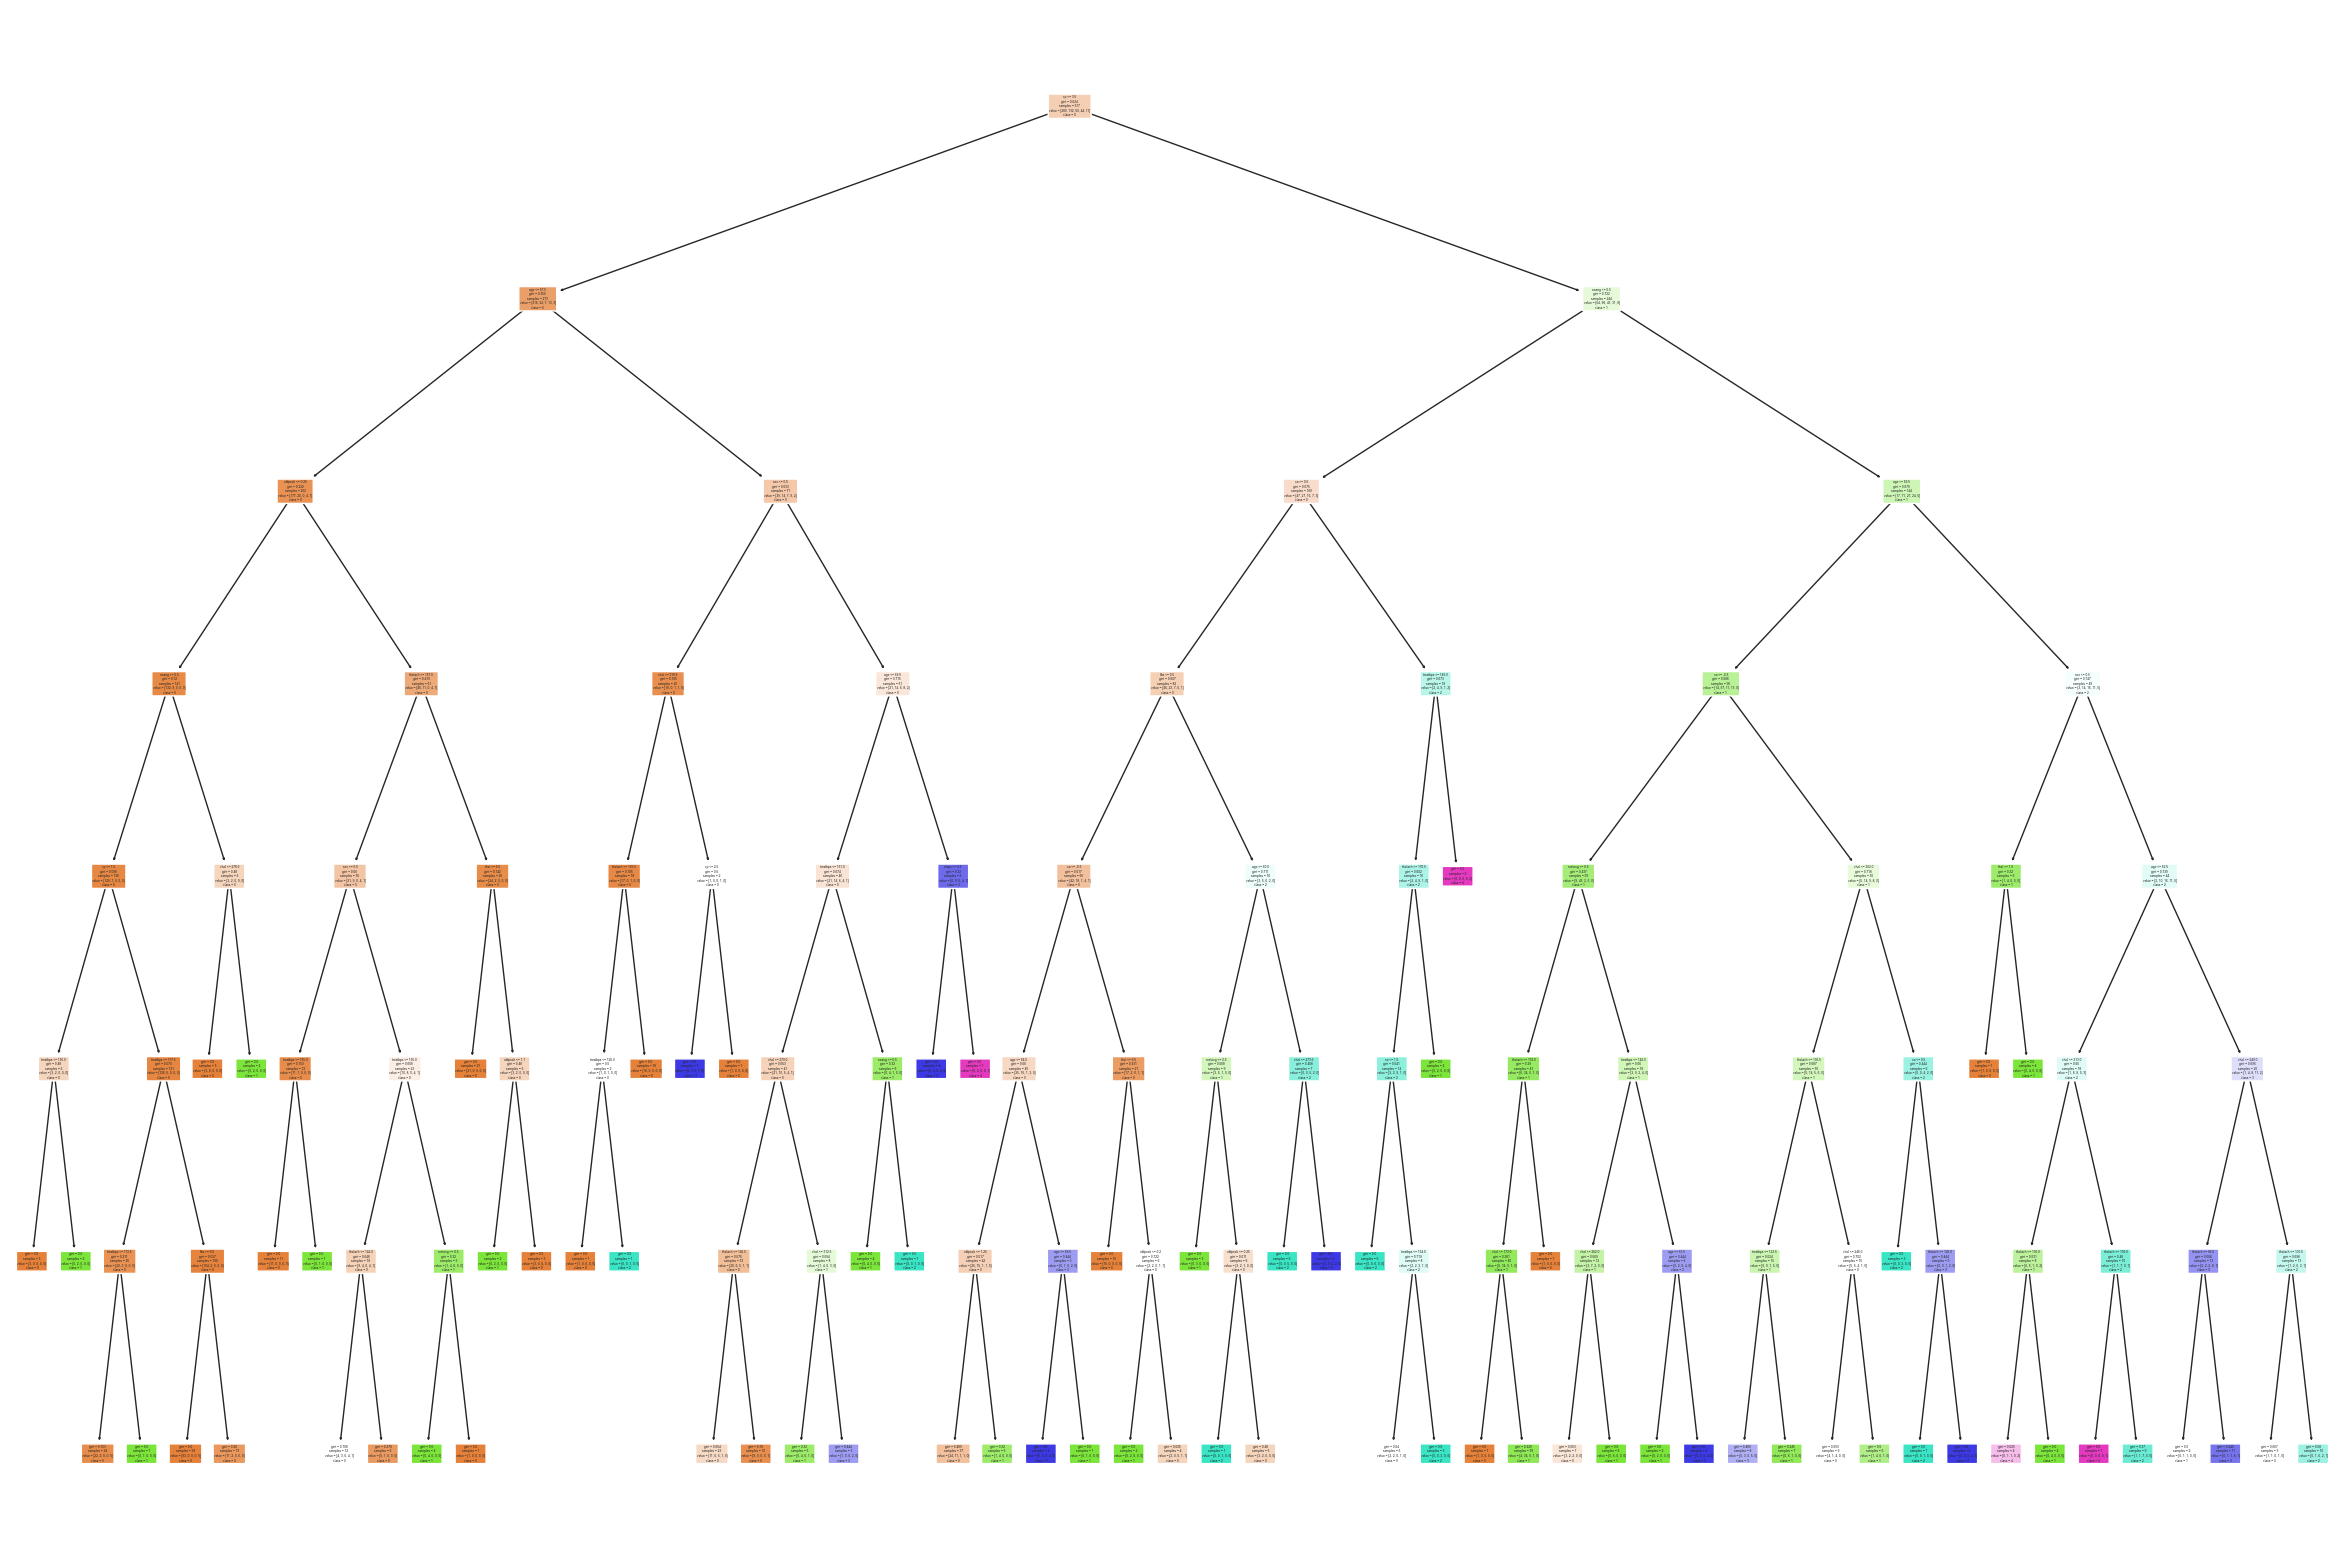

In [18]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["0","1", "2", "3", "4"])

In [19]:
clf = DecisionTreeClassifier().fit(X, y)
print(clf.feature_importances_)

[0.11410166 0.03175516 0.155867   0.10173517 0.18647941 0.02313579
 0.05436388 0.1262871  0.03466673 0.04746623 0.02983507 0.06590409
 0.0284027 ]


In [20]:
from sklearn.feature_selection import RFE

# clf is the classifier (e.g., DecisionTreeClassifier) already defined
selector = RFE(clf, n_features_to_select=10)
selector = selector.fit(X, y)

# Indicates which features were selected
selected_features = selector.support_

# Ranking of features
ranking = selector.ranking_

ranking

array([1, 1, 1, 1, 1, 4, 1, 1, 2, 1, 3, 1, 1])

In [21]:
selected_features

array([ True,  True,  True,  True,  True, False,  True,  True, False,
        True, False,  True,  True])

In [22]:
importance = [True, False,  True,  True,  True, True, True,  True, False, True, False,  True,  True, True]
selected_columns = combined_df.columns[importance]
filtered_df = combined_df[selected_columns]
filtered_df

,age,cp,trestbps,chol,fbs,restecg,thalach,oldpeak,ca,thal,num
0,63.0,1.0,145.0,233.0,1.0,2.0,150.0,2.3,0.0,6.0,0.0
1,67.0,4.0,160.0,286.0,0.0,2.0,108.0,1.5,3.0,3.0,2.0
2,67.0,4.0,120.0,229.0,0.0,2.0,129.0,2.6,2.0,7.0,1.0
3,37.0,3.0,130.0,250.0,0.0,0.0,187.0,3.5,0.0,3.0,0.0
4,41.0,2.0,130.0,204.0,0.0,2.0,172.0,1.4,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
685,54.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,-1.0,-1.0,1.0
686,62.0,1.0,130.0,139.0,0.0,1.0,140.0,0.5,-1.0,-1.0,0.0
687,55.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,-1.0,6.0,2.0
688,58.0,4.0,130.0,385.0,1.0,2.0,140.0,0.5,-1.0,-1.0,0.0


In [23]:
# Extract Response and Predictors
filtered_predictors = ["age", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "oldpeak", "ca", "thal"]

y = pd.DataFrame(filtered_df['num'].astype('category'))
X = pd.DataFrame(filtered_df[filtered_predictors]) 

In [24]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=10)

In [25]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Ensure figures are displayed inline in Jupyter Notebook
%matplotlib inline

In [26]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6673114119922631

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.6416184971098265



**BINARY CLASSIFICATION TREE**

In [27]:
combined_df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
685,54.0,0.0,4.0,127.0,333.0,1.0,1.0,154.0,0.0,0.0,2.0,-1.0,-1.0,1.0
686,62.0,1.0,1.0,130.0,139.0,0.0,1.0,140.0,0.0,0.5,2.0,-1.0,-1.0,0.0
687,55.0,1.0,4.0,122.0,223.0,1.0,1.0,100.0,0.0,0.0,2.0,-1.0,6.0,2.0
688,58.0,1.0,4.0,130.0,385.0,1.0,2.0,140.0,0.0,0.5,2.0,-1.0,-1.0,0.0


In [28]:
# Import essential models and functions from sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Extract Response and Predictors
predictors = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal"]

y = pd.DataFrame(combined_df['num'].astype('category'))
X = pd.DataFrame(combined_df[predictors]) 

In [29]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

In [30]:
# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Response corresponding to Predictors
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Ensure figures are displayed inline in Jupyter Notebook
%matplotlib inline

In [31]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.6982591876208898

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.5895953757225434



<Axes: >

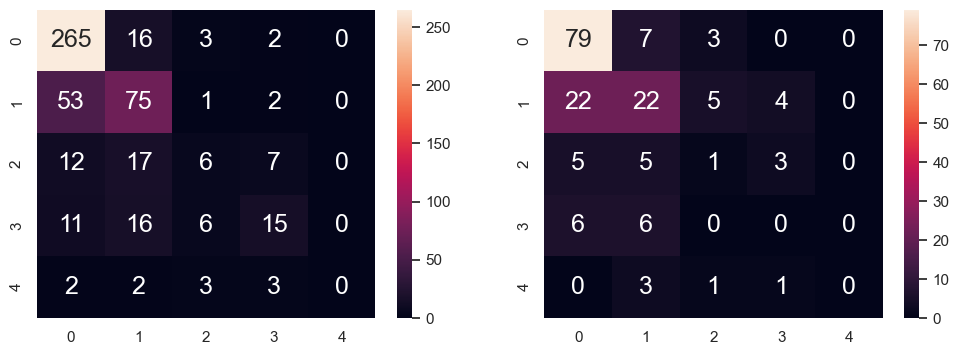

In [32]:
# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

In [33]:
# Plot the trained Decision Tree
from sklearn.tree import plot_tree

f = plt.figure(figsize=(30,20))
plot_tree(dectree, filled=True, rounded=True, 
          feature_names=X_train.columns.tolist(), 
          class_names=["0","1", "2", "3", "4"])

[Text(0.5, 0.9, 'cp <= 3.5\ngini = 0.614\nsamples = 517\nvalue = [286, 131, 42, 48, 10]\nclass = 0'),
 Text(0.25, 0.7, 'age <= 54.5\ngini = 0.337\nsamples = 264\nvalue = [212, 33, 5, 12, 2]\nclass = 0'),
 Text(0.125, 0.5, 'thal <= 6.5\ngini = 0.172\nsamples = 161\nvalue = [146, 12, 0, 3, 0]\nclass = 0'),
 Text(0.0625, 0.3, 'oldpeak <= 3.55\ngini = 0.127\nsamples = 148\nvalue = [138, 8, 0, 2, 0]\nclass = 0'),
 Text(0.03125, 0.1, 'gini = 0.116\nsamples = 147\nvalue = [138, 7, 0, 2, 0]\nclass = 0'),
 Text(0.09375, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]\nclass = 1'),
 Text(0.1875, 0.3, 'thalach <= 143.5\ngini = 0.521\nsamples = 13\nvalue = [8, 4, 0, 1, 0]\nclass = 0'),
 Text(0.15625, 0.1, 'gini = 0.444\nsamples = 3\nvalue = [0, 2, 0, 1, 0]\nclass = 1'),
 Text(0.21875, 0.1, 'gini = 0.32\nsamples = 10\nvalue = [8, 2, 0, 0, 0]\nclass = 0'),
 Text(0.375, 0.5, 'sex <= 0.5\ngini = 0.537\nsamples = 103\nvalue = [66, 21, 5, 9, 2]\nclass = 0'),
 Text(0.3125, 0.3, 'ca <= 1.5\ngini = 

## **RandomForestClassifier**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)
predictions = rf_clf.predict(X_test)

# Evaluate the model
print(f'Accuracy: {accuracy_score(y_test, predictions)}')

/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Accuracy: 0.5953757225433526


In [ ]:
from skopt import BayesSearchCV
from skopt.space import Real, Categorical, Integer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split


# Define search spaces for hyperparameters
search_spaces = {
    'n_estimators': Integer(10, 250),
    'max_depth': Integer(1, 50),
    'min_samples_split': Real(0.01, 1.0, 'uniform'),
    'min_samples_leaf': Integer(1, 50),
    'bootstrap': Categorical([True, False])
}

# Initialize the classifier
clf = RandomForestClassifier(random_state=0)

# Setup Bayesian optimization
opt = BayesSearchCV(clf, search_spaces, n_iter=50, n_jobs=-1, cv=5)

# Perform the hyperparameter search
opt.fit(X_train, y_train)

# Best model found
print("Best parameters found: ", opt.best_params_)

/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expecte

Best parameters found:  OrderedDict([('bootstrap', False), ('max_depth', 30), ('min_samples_leaf', 20), ('min_samples_split', 0.14138595097932946), ('n_estimators', 197)])


In [ ]:
# Train the model with the best found parameters
best_model = RandomForestClassifier(**opt.best_params_)
best_model.fit(X_train, y_train)

# Make predictions on the test set
predictions = best_model.predict(X_test)

# Calculate the classification accuracy
accuracy = accuracy_score(y_test, predictions)

print(f'Classification Accuracy: {accuracy}')

/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Classification Accuracy: 0.6358381502890174



## **KNN**



In [ ]:

# Import necessary libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Assume X_train, X_test, y_train, y_test are your pre-split datasets

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Make predictions
predictions = knn.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
print(f"Classification Accuracy: {accuracy}")


Classification Accuracy: 0.6242774566473989


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


#### Optimization of KNN using Bayesian Optimization

In [ ]:
search_spaces = {
    'kneighborsclassifier__n_neighbors': Integer(1, 30),
    'kneighborsclassifier__weights': Categorical(['uniform', 'distance']),
    'kneighborsclassifier__metric': Categorical(['euclidean', 'manhattan', 'minkowski'])
}

# Create a pipeline that scales features and then applies KNN
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())

# Initialize Bayesian optimization with the BayesSearchCV object
opt = BayesSearchCV(
    estimator=pipe,
    search_spaces=search_spaces,
    n_iter=50,  # Number of iterations
    cv=5,       # 5-fold cross-validation
    n_jobs=-1,  # Use all available cores
    random_state=42
)

# Fit the model
opt.fit(X_train, y_train)

# Best hyperparameters
print(f"Best parameters: {opt.best_params_}")

# Evaluate the classification accuracy on the test set
test_score = opt.score(X_test, y_test)
print(f"Classification Accuracy: {test_score}")


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/neighbors/_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array 

## **SVM**


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train SVM
svc = SVC(kernel='linear', C=1.0)
svc.fit(X_train_scaled, y_train)

# Predict and evaluate
y_pred = svc.predict(X_test_scaled)
print(f'Classification Accuracy: {accuracy_score(y_test, y_pred)}')

Classification Accuracy: 0.5895953757225434


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


#### Optimization of SVM using Bayesian Optimization

In [ ]:
# Define the search space
search_spaces = {
    'C': Real(0.1, 100, prior='log-uniform'),  # Regularization parameter
    'kernel': Categorical(['linear', 'rbf']),  # Kernel type
    'gamma': Categorical(['scale', 'auto'])    # Kernel coefficient for 'rbf'
}

# Initialize the BayesSearchCV object
bayes_search = BayesSearchCV(estimator=SVC(), search_spaces=search_spaces, n_iter=32, cv=5, scoring='accuracy', n_jobs=-1, random_state=42, verbose=1)

# Fit BayesSearchCV
bayes_search.fit(X_train_scaled, y_train)

# Best hyperparameters and best score
print("Best parameters:", bayes_search.best_params_)
print("Best cross-validation score: {:.2f}".format(bayes_search.best_score_))

# Evaluate on the test set
y_pred_bs = bayes_search.predict(X_test_scaled)
print(f'Test set Classification Accuracy (BayesSearch): {accuracy_score(y_test, y_pred_bs)}')

/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits
Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was e

Best parameters: OrderedDict([('C', 0.8391407016536243), ('gamma', 'auto'), ('kernel', 'rbf')])
Best cross-validation score: 0.65
Test set Classification Accuracy (BayesSearch): 0.5953757225433526


/Users/owennigel/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
